# LEVEL-3

# task1- analyze the text reviews to identify the most common positive and negative keywords and calculate the average length of reviews and explore if there is a relationship between review length and rating

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv('Dataset.csv')
print(df.head())
reviews = df['Rating text']

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [3]:
df['Review text'] = df['Rating text'].fillna('')

In [4]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [5]:
def get_sentiment_score(text):
    return sentiment_analyzer.polarity_scores(text)['compound']

df['Sentiment Score'] = reviews.apply(get_sentiment_score)
df['Sentiment'] = df['Sentiment Score'].apply(lambda score: 'Positive' if score >= 0 else 'Negative')


In [6]:
positive_keywords = {}
negative_keywords = {}

stop_words = set(stopwords.words('english'))

for index, row in df.iterrows():
    words = nltk.word_tokenize(row['Review text'].lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    
    for word in filtered_words:
        if row['Sentiment'] == 'Positive':
            positive_keywords[word] = positive_keywords.get(word, 0) + 1
        else:
            negative_keywords[word] = negative_keywords.get(word, 0) + 1

In [7]:
top_positive_keywords = dict(sorted(positive_keywords.items(), key=lambda item: item[1], reverse=True)[:10])
top_negative_keywords = dict(sorted(negative_keywords.items(), key=lambda item: item[1], reverse=True)[:10])


print("Top 10 Positive Keywords:", top_positive_keywords)
print("Top 10 Negative Keywords:", top_negative_keywords)

Top 10 Positive Keywords: {'average': 3737, 'good': 3179, 'rated': 2148, 'excellent': 301}
Top 10 Negative Keywords: {'poor': 186}


In [8]:

df['Review Length'] = df['Review text'].apply(lambda x: len(nltk.word_tokenize(x)))
average_review_length = df['Review Length'].mean()


In [9]:
print(f"Average Review Length: {average_review_length:.2f} words")

Average Review Length: 1.34 words


In [10]:
df['Rating color'] = pd.to_numeric(df['Rating color'], errors='coerce')

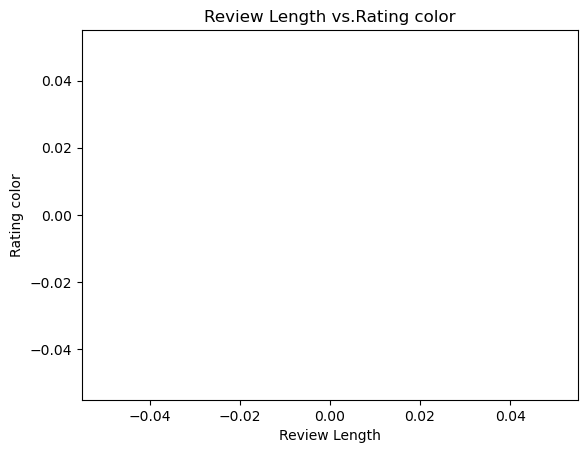

In [11]:
plt.scatter(df['Review Length'], df['Rating color'])
plt.xlabel('Review Length')
plt.ylabel('Rating color')
plt.title('Review Length vs.Rating color')
plt.show()

In [12]:
correlation_coefficient = df['Review Length'].corr(df['Rating color'])
print("Correlation Coefficient between Review Length and Rating color:", correlation_coefficient)

Correlation Coefficient between Review Length and Rating color: nan


# task-2 identify the restaurants with highest and lowest number of votes, analyze if there is a correlation between the number of votes and the ratin of a restaurant 

In [13]:
highest_votes_index = df['Votes'].idxmax()

In [14]:
lowest_votes_index = df['Votes'].idxmin()

In [15]:
restaurant_with_highest_votes = df.loc[highest_votes_index]
restaurant_with_lowest_votes = df.loc[lowest_votes_index]

In [16]:
print("Restaurant with the Highest Number of Votes:")
print(restaurant_with_highest_votes)

print("\nRestaurant with the Lowest Number of Votes:")
print(restaurant_with_lowest_votes)

Restaurant with the Highest Number of Votes:
Restaurant ID                                                       51705
Restaurant Name                                                      Toit
Country Code                                                            1
City                                                            Bangalore
Address                 298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                      Indiranagar
Locality Verbose                                   Indiranagar, Bangalore
Longitude                                                       77.640709
Latitude                                                        12.979166
Cuisines                                         Italian, American, Pizza
Average Cost for two                                                 2000
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                  

In [17]:
from scipy.stats import pearsonr

In [18]:
correlation_coefficient, p_value = pearsonr(df['Votes'], df['Aggregate rating'])

In [19]:
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.4f}")

Correlation Coefficient: 0.31
P-value: 0.0000


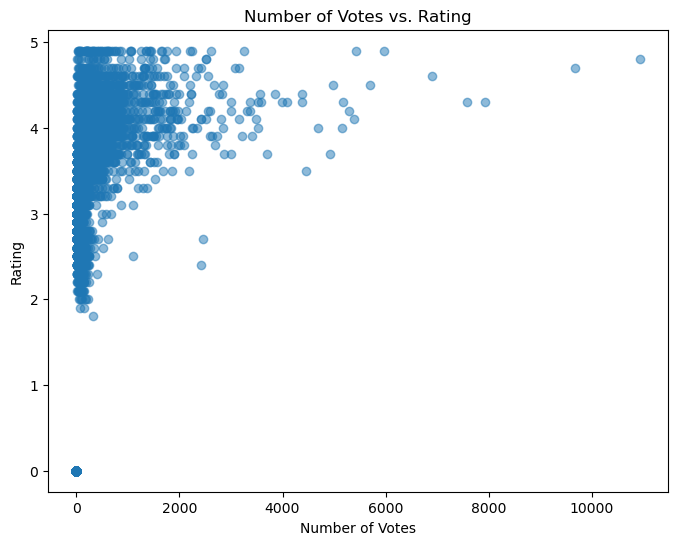

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Votes'], df['Aggregate rating'], alpha=0.5)
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.title('Number of Votes vs. Rating')
plt.show()

# task3- analyze if there is relationship between the price range and the availability of online delivery and table booking, determine if higher-priced restaurants are more likely to offer thes 

In [21]:
from scipy.stats import chi2_contingency


In [22]:
contingency_table = pd.crosstab(df['Price range'], [df['Has Online delivery'], df['Has Table booking']])

In [23]:
print(contingency_table)


Has Online delivery    No        Yes     
Has Table booking      No  Yes    No  Yes
Price range                              
1                    3743    0   700    1
2                    1711  116  1163  123
3                     624  373   140  271
4                     299  234    13   40


In [24]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [25]:
print(f"Chi-square Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")


Chi-square Statistic: 3778.71
P-value: 0.0000


<Figure size 800x600 with 0 Axes>

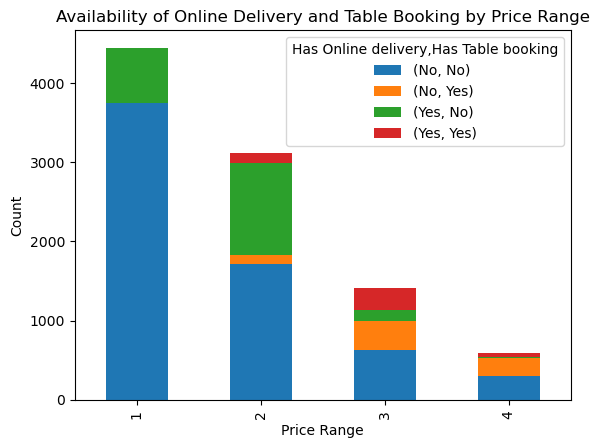

In [26]:
plt.figure(figsize=(8, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Availability of Online Delivery and Table Booking by Price Range')
plt.show()

In [27]:
contingency_online_delivery = pd.crosstab(df['Price range'], df['Has Online delivery'], normalize='index')
contingency_table_booking = pd.crosstab(df['Price range'], df['Has Table booking'], normalize='index')

In [28]:
chi2_online_delivery, p_online_delivery, _, _ = chi2_contingency(contingency_online_delivery)
chi2_table_booking, p_table_booking, _, _ = chi2_contingency(contingency_table_booking)


In [29]:
print(f"P-value for Online Delivery: {p_online_delivery:.4f}")
print(f"P-value for Table Booking: {p_table_booking:.4f}")

P-value for Online Delivery: 0.9523
P-value for Table Booking: 0.8077
